In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Dataset has 1000 rows and 8 Columns

Checking Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No Missing value present

Checking Duplicate Records

In [6]:
df.duplicated().sum()

0

No Duplicate Records found

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


INSIGHTS
    All the mean are very close to each other between 66 and 69.2
    All standred deviations are very close between 14.6 to 15.2

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


EDA

In [11]:
print("Categories in 'gender': ", df['gender'].unique())
print("Categories in 'race_ethnicity': ", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education': ", df['parental_level_of_education'].unique())
print("Categories in 'lunch': ", df['lunch'].unique())
print("Categories in 'test_preparation_course': ", df['test_preparation_course'].unique())

Categories in 'gender':  ['female' 'male']
Categories in 'race_ethnicity':  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education':  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch':  ['standard' 'free/reduced']
Categories in 'test_preparation_course':  ['none' 'completed']


defining Numeric and Categorical feature

In [12]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("numeric_feature are ", numeric_feature)
print("Categorical_Feature are ", categorical_feature)

numeric_feature are  ['math_score', 'reading_score', 'writing_score']
Categorical_Feature are  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding total score and average columns

In [13]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Count of Students with full marks

In [14]:
reading_fullscore_count = df[df['reading_score']==100] ['reading_score'].count()
math_fullscore_count = df[df['math_score']==100] ['math_score'].count()
writing_fullscore_count = df[df['writing_score'] == 100] ['writing_score'].count()

print("Count of students with full marks in reading: ", reading_fullscore_count)
print("Count of students with full marks in math: ", math_fullscore_count)
print("Count of students with full marks in writing: ", writing_fullscore_count)

Count of students with full marks in reading:  17
Count of students with full marks in math:  7
Count of students with full marks in writing:  14


Count of Students below 50

In [15]:
reading_below_50_count = df[df['reading_score'] < 50] ['reading_score'].count()
math_below_50_count = df[df['math_score'] < 50] ['math_score'].count()
writing_below_50_count = df[df['writing_score'] < 50] ['writing_score'].count()

print("Count of students with below 50 marks in reading: ", reading_below_50_count)
print("Count of students with below 50 marks in math: ", math_below_50_count)
print("Count of students with below 50 marks in writing: ", writing_below_50_count)

Count of students with below 50 marks in reading:  90
Count of students with below 50 marks in math:  135
Count of students with below 50 marks in writing:  114


INSIGHTS
    From the above we can observe that student have performed worst in math
    Best performing scetion is reading

Visulazation
    Visualize average score distribution to make some conclusion.
        Histogram
        Kernel Distribution Function (KDE)

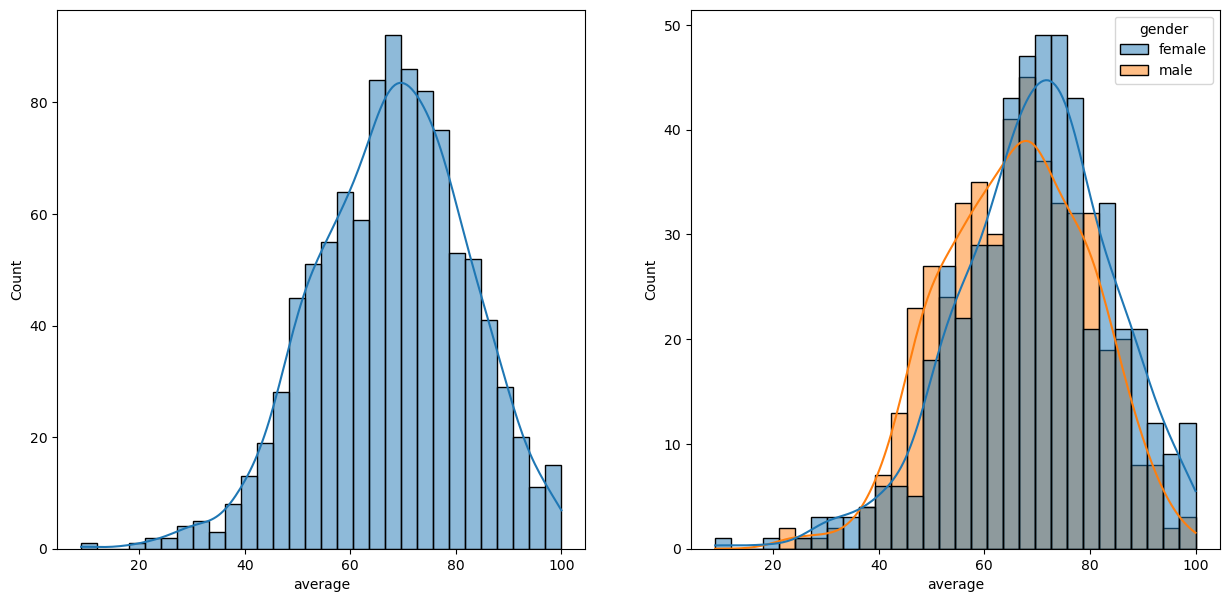

In [16]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x= 'average', bins=30, kde=True)

plt.subplot(122)
sns.histplot(data=df, x='average', bins = 30, kde=True, hue='gender')
plt.show()

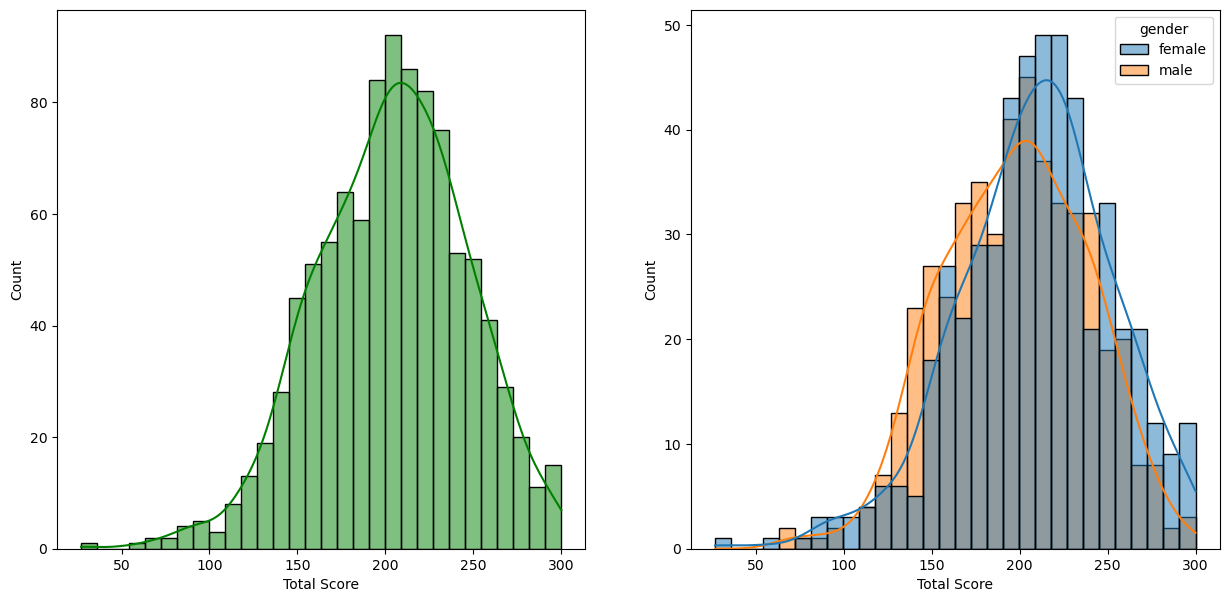

In [17]:
fig, axe = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'Total Score', bins=30, kde=True,color = 'green')

plt.subplot(122)
sns.histplot(data = df, x='Total Score', bins = 30, kde=True, hue='gender')
plt.show()

INSIGHT 
    Female student Perform will then male students

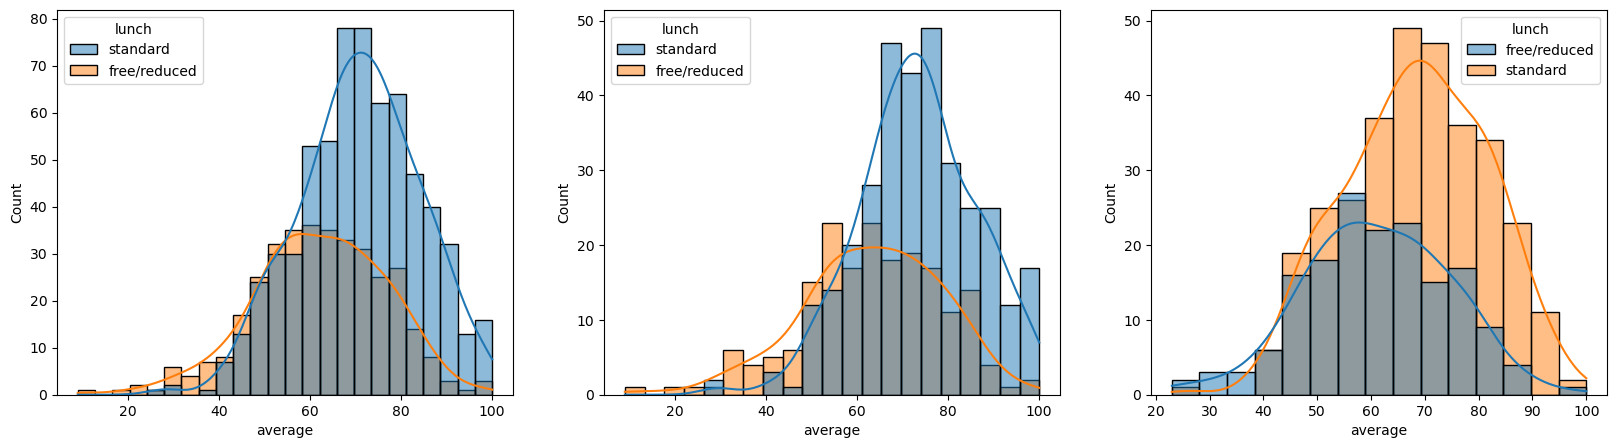

In [18]:
fig, axe = plt.subplots(1,3, figsize = (20,5))
plt.subplot(131)
sns.histplot(data = df, x = 'average', hue='lunch', kde=True)

plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x='average', hue='lunch', kde =True)

plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x ='average', hue = 'lunch', kde=True)
plt.show()

INSIGHT
    Standard lunch helps to perfoem will in exam be it male or female

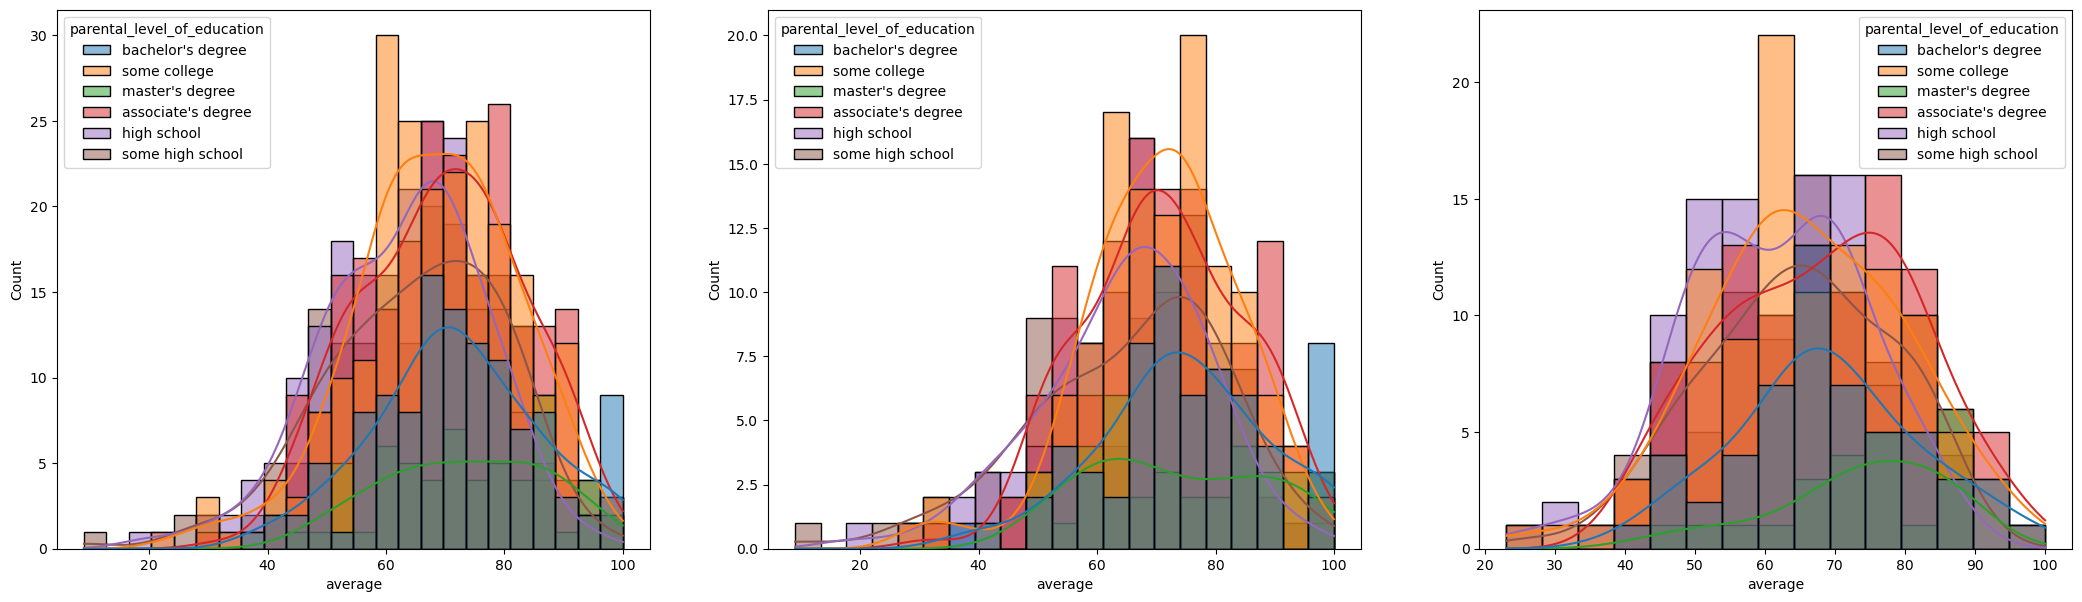

In [25]:
fig, axe = plt.subplots(1,3, figsize = (26,7))
plt.subplot(131)
sns.histplot(data=df, x=df['average'], hue= df['parental_level_of_education'], kde=True)

plt.subplot(132)
sns.histplot(data=df[df['gender']== 'female'], x='average' ,hue=df.parental_level_of_education, kde=True)

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x = 'average', hue=df['parental_level_of_education'], kde=True)

plt.show()

INSIGHTS:
    Students who's parents has bachelor degree performance well
    Female students having parents with bachelor degree tends to perform well
    Male students having paarents with master degree tends to perform well

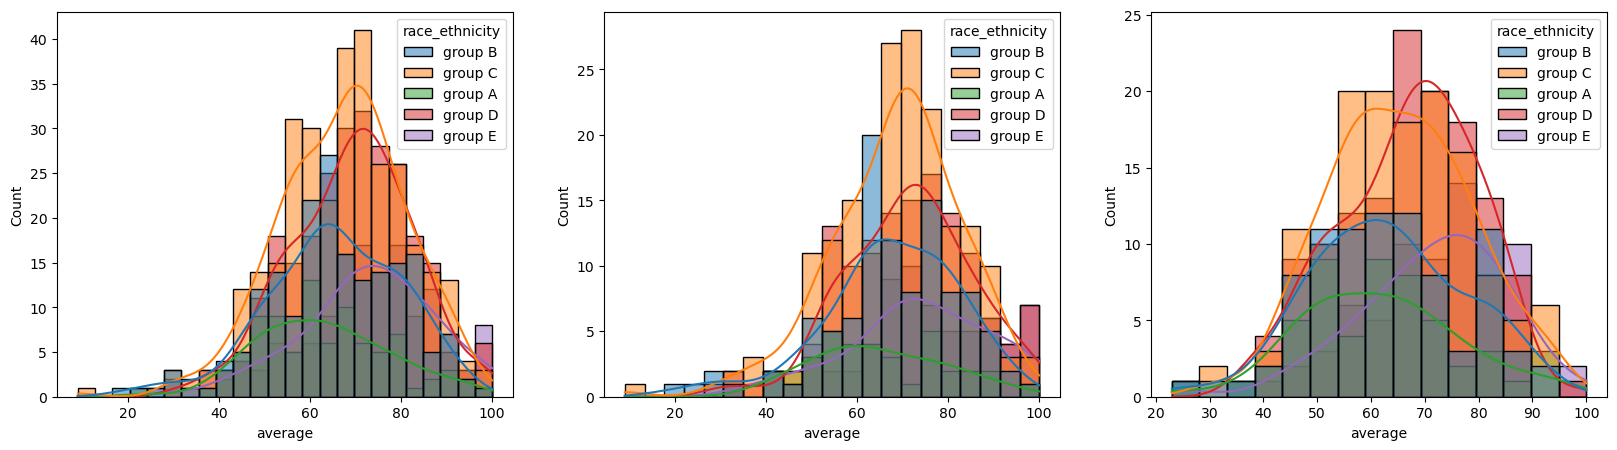

In [26]:
fig, axe = plt.subplots(1,3, figsize = (20, 5))
plt.subplot(131)
sns.histplot(data = df, x = 'average', hue=df.race_ethnicity, kde=True)

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', hue=df.race_ethnicity, kde=True)

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x= 'average', hue = df.race_ethnicity, kde=True)

plt.show()

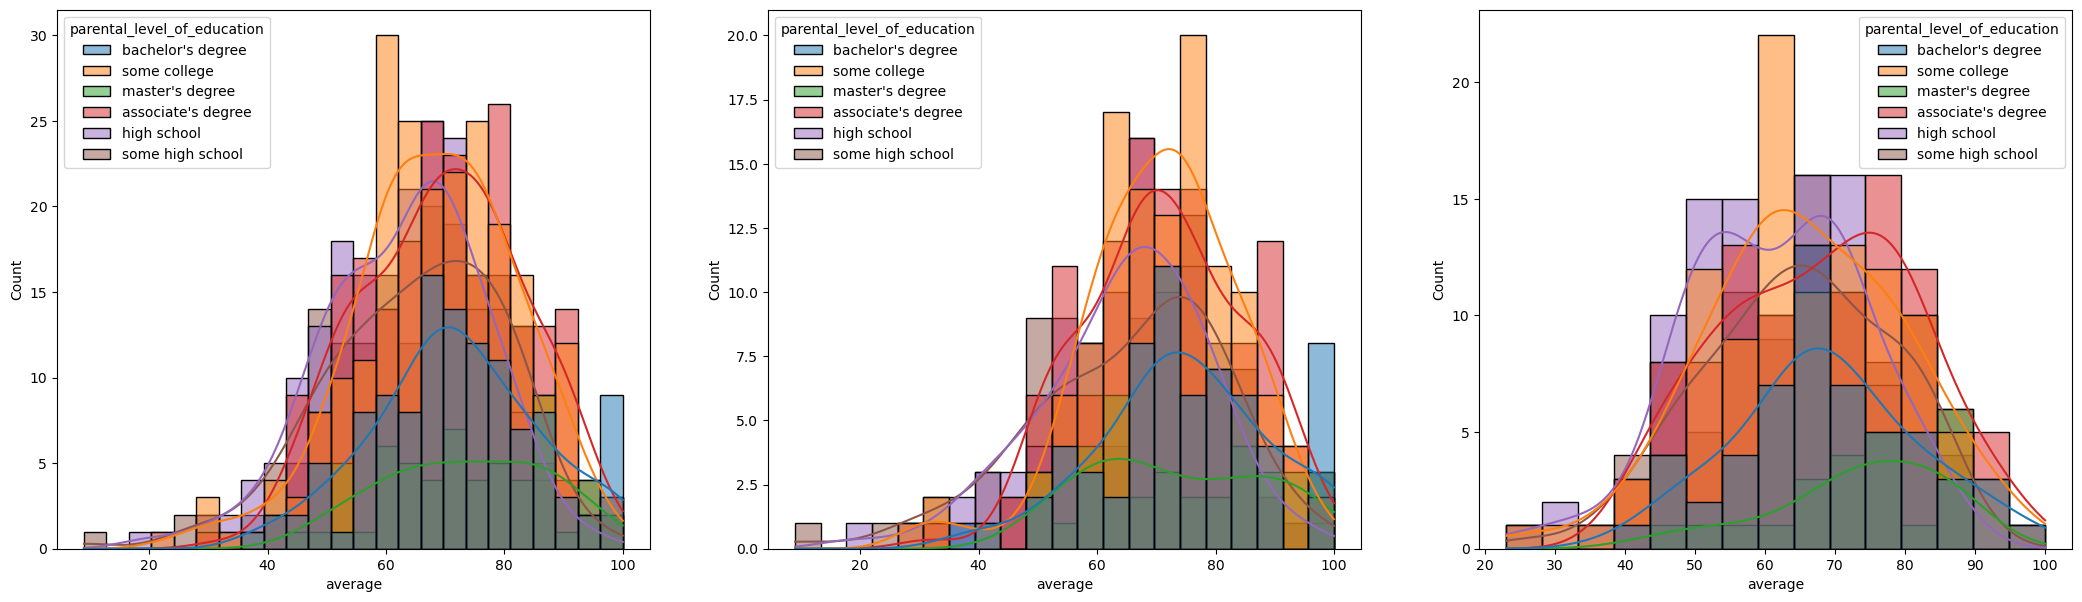

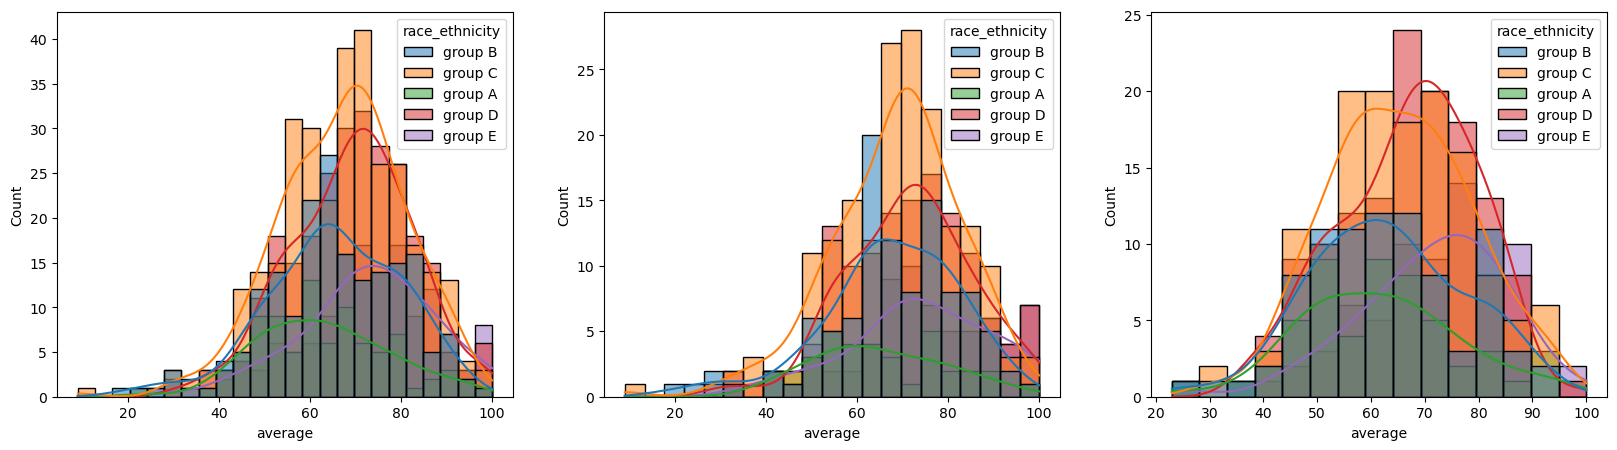

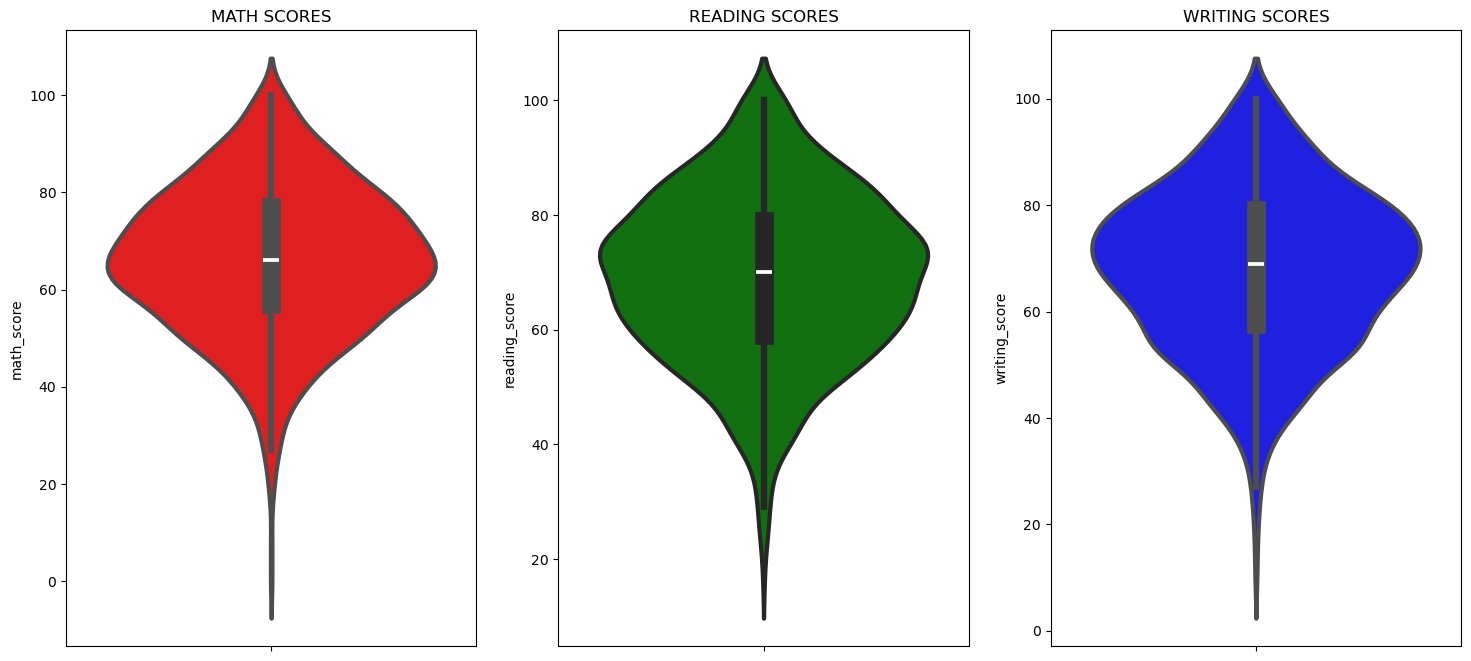

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

INSIGHTS:
    From the above three charts we can observe that in Math most students score marks between 60 to 80 whereas as in Reading and Writing most students score marks between 50 to 80 

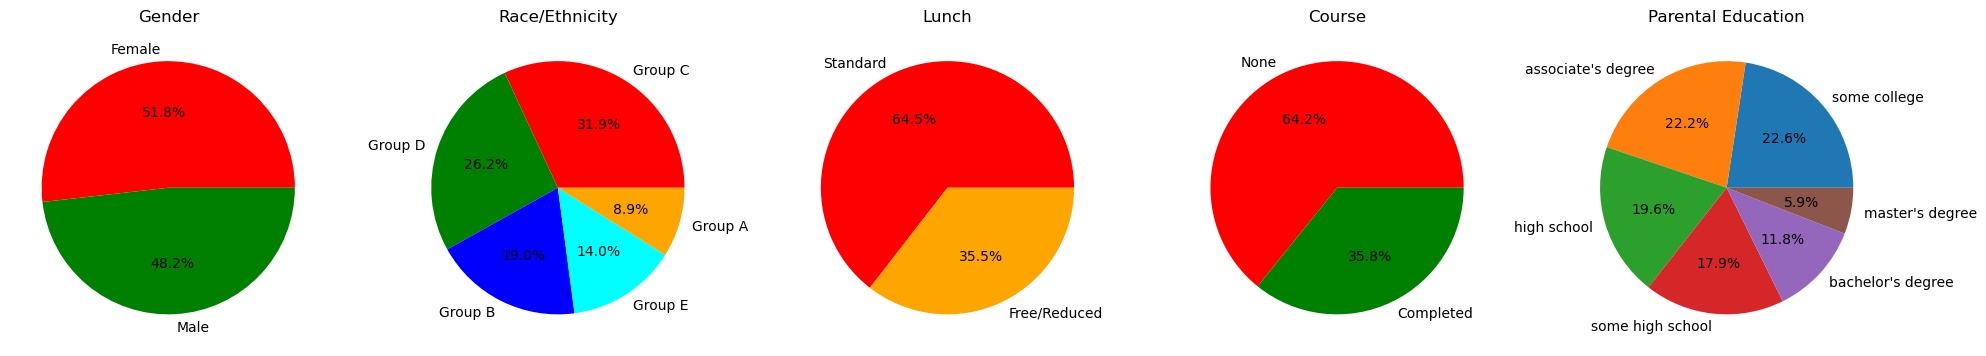

In [22]:
fig, axes = plt.subplots(1,5, figsize = (20, 5))
plt.subplot(151)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']
plt.pie(size,labels=labels, colors=color, autopct='%1.1f%%')
plt.title('Gender')

plt.subplot(152)
size = df.race_ethnicity.value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Race/Ethnicity')

plt.subplot(153)
size = df.lunch.value_counts()
labels = ['Standard', 'Free/Reduced']
color = ['red', 'orange']
plt.pie(size, labels=labels,colors=color, autopct='%1.1f%%')
plt.title('Lunch')

plt.subplot(154)
size = df.test_preparation_course.value_counts()
labels = ['None', 'Completed']
color = ['red', 'green']
plt.pie(size, labels=labels, colors= color, autopct = '%1.1f%%')
plt.title('Course')

plt.subplot(155)
size = df.parental_level_of_education.value_counts()
labels = ['some college',"associate's degree",'high school','some high school',"bachelor's degree", "master's degree"]
plt.pie(size,labels= labels, autopct = '%1.1f%%')
plt.title('Parental Education')
plt.tight_layout()
plt.grid()
plt.show()


INSIGHTS:
    The number of male and female students are almost equal.
    There are more number of Group C Race/Ethnicity Students.
    Standard is most common lunch type.
    Nomber of Students who have not enrolled in any test preparation course is greater.
    Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

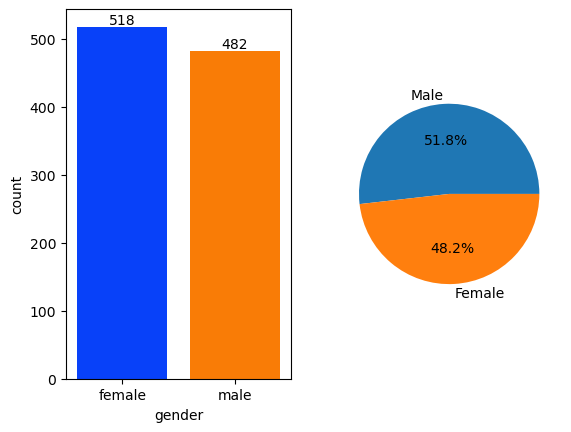

In [23]:
f,ax=plt.subplots(1,2)
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container)

ax[1].pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.show()

INSIGHTS:
    Gender has balanced data with female students are 518 (48%) and male students are 482.

In [24]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
